In [1]:
#Setup

import numpy as np
import matplotlib.pyplot as plt

from __future__ import print_function

%matplotlib inline

random_seed = 0


In [2]:
from head.data_utils import load_CIFAR10


#Load Data

def get_CIFAR10_data(num_training=49000, num_validation=1000, num_test=1000):
    
    cifar10_dir = 'datasets/cifar-10-batches-py'
    X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)
        
    # Subsample the data
    mask = list(range(num_training, num_training + num_validation))
    X_val = X_train[mask]
    y_val = y_train[mask]
    mask = list(range(num_training))
    X_train = X_train[mask]
    y_train = y_train[mask]
    mask = list(range(num_test))
    X_test = X_test[mask]
    y_test = y_test[mask]

    # Normalize the data: subtract the mean image
    #mean_image = np.mean(X_train, axis=0)
    #X_train -= mean_image
    #X_val -= mean_image
    #X_test -= mean_image

    # Reshape data to rows
    #X_train = X_train.reshape(num_training, -1)
    #X_val = X_val.reshape(num_validation, -1)
    #X_test = X_test.reshape(num_test, -1)

    return X_train, y_train, X_val, y_val, X_test, y_test


# Invoke the above function to get our data.
X_train, y_train, X_val, y_val, X_test, y_test = get_CIFAR10_data()
print('Train data shape: ', X_train.shape)
print('Train labels shape: ', y_train.shape)
print('Validation data shape: ', X_val.shape)
print('Validation labels shape: ', y_val.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)

Train data shape:  (49000, 32, 32, 3)
Train labels shape:  (49000,)
Validation data shape:  (1000, 32, 32, 3)
Validation labels shape:  (1000,)
Test data shape:  (1000, 32, 32, 3)
Test labels shape:  (1000,)


In [3]:
from head.data_utils import load_CIFAR10


#Load Data

def get_CIFAR10_data_downsample(num_training=49000, num_validation=1000, num_test=1000):
    
    cifar10_dir = 'datasets/cifar-10-batches-py'
    X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)
        
    # Subsample the data
    mask = list(range(num_training, num_training + num_validation))
    X_val = X_train[mask, 0:31:2, 0:31:2]
    y_val = y_train[mask]
    mask = list(range(num_training))
    X_train = X_train[mask, 0:31:2, 0:31:2]
    y_train = y_train[mask]
    mask = list(range(num_test))
    X_test = X_test[mask, 0:31:2, 0:31:2]
    y_test = y_test[mask]

    # Normalize the data: subtract the mean image
    mean_image = np.mean(X_train, axis=0)
    X_train -= mean_image
    X_val -= mean_image
    X_test -= mean_image

    # Reshape data to rows
    X_train = X_train.reshape(num_training, -1)
    X_val = X_val.reshape(num_validation, -1)
    X_test = X_test.reshape(num_test, -1)

    return X_train, y_train, X_val, y_val, X_test, y_test


# Invoke the above function to get our data.
X_train, y_train, X_val, y_val, X_test, y_test = get_CIFAR10_data_downsample()
print('Train data shape: ', X_train.shape)
print('Train labels shape: ', y_train.shape)
print('Validation data shape: ', X_val.shape)
print('Validation labels shape: ', y_val.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)

Train data shape:  (49000, 768)
Train labels shape:  (49000,)
Validation data shape:  (1000, 768)
Validation labels shape:  (1000,)
Test data shape:  (1000, 768)
Test labels shape:  (1000,)


IndexError: too many indices for array

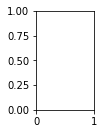

In [4]:
import matplotlib.pyplot as plt
#X_show = X_train.reshape(49000, 32, 32, 3)
#plt.figure(figsize = (15, 15))
for i in np.arange(1, 100, 10):
    plt.subplot(2, 5, int(i//10)+1)
    plt.imshow(X_train[i, 0:31:2, 0:31:2])
    plt.show()

In [5]:
#Network Settings

input_size = 16 * 16 * 3
hidden_size = 30
num_classes = 10


In [18]:
#Training hyperparameters
batch_size = 200
step_len = 0.001
reg = 0.1
punish_strength = 0.01
if_sparse = True

from head.neural_net import TwoLayerNet
net_sa = TwoLayerNet(input_size, hidden_size, num_classes)
stats_sa = net_sa.train_sa_sparse(X_train, y_train, X_val, y_val,
        num_iters=3000, batch_size=batch_size, step_len = step_len,
        reg=reg, T_max = 0.5, T_min = 0.001, if_sparse = if_sparse,
        punish_strength = punish_strength, verbose=True)

test_acc = (net_sa.predict(X_test) == y_test).mean()
print('Test accuracy: ', test_acc)

iteration 0 / 3000: loss 2.302649
Ratio: inf   Reject: 0   Accept: 1
9222 / 23040 W1 params change
Punish for W1 mean 0.000000, max 0.000000


G:\CBICR_contest\Source\head\neural_net.py:291: RuntimeWarning: overflow encountered in exp
  ratio = np.exp((loss_past - loss_new) / T)


iteration 100 / 3000: loss 2.306411
Ratio: 1.001847722843567   Reject: 0   Accept: 101
733 / 23040 W1 params change
Punish for W1 mean 0.000000, max 0.000000
iteration 200 / 3000: loss 2.310198
Ratio: 0.9992520610480763   Reject: 0   Accept: 201
18 / 23040 W1 params change
Punish for W1 mean -0.000000, max 0.000000
iteration 300 / 3000: loss 2.313246
Ratio: 0.9949382361041582   Reject: 0   Accept: 301
9 / 23040 W1 params change
Punish for W1 mean 0.000000, max 0.000000
iteration 400 / 3000: loss 2.314400
Ratio: 0.9922209228142639   Reject: 2   Accept: 399
122 / 23040 W1 params change
Punish for W1 mean -0.000000, max 0.000000
iteration 500 / 3000: loss 2.317292
Ratio: 0.9924781892084378   Reject: 2   Accept: 499
769 / 23040 W1 params change
Punish for W1 mean 0.000000, max 0.000000
iteration 600 / 3000: loss 2.311828
Ratio: 1.0437733520842125   Reject: 4   Accept: 597
108 / 23040 W1 params change
Punish for W1 mean -0.000000, max 0.000000
iteration 700 / 3000: loss 2.319848
Ratio: 0.96

## Return to alternative training approach

In [17]:
#Alternative training using SGD and SA 

#Network Settings

input_size = 16 * 16 * 3
hidden_size = 30
num_classes = 10

from head.neural_net import TwoLayerNet

#np.random.seed(random_seed)

#Training hyperparams
batch_size = 200
learning_rate = 5e-4
reg = 0.1
step_len = 0.001

test_acc_list_alter = []
train_acc_list_alter = []
loss_list_alter = []

for i in range(10):
    print('The %d th training' % i)
    net_bp_alter = TwoLayerNet(input_size, hidden_size, num_classes)
    stats_bp_alter1 = net_bp_alter.train_bp(X_train, y_train, X_val, y_val,
                    num_iters=20000, batch_size=batch_size,
                    learning_rate=learning_rate, learning_rate_decay=0.95,
                    reg=reg, print_every = 1000)

    stats_sa = net_bp_alter.train_sa(X_train, y_train, X_val, y_val,
            num_iters=3000, batch_size=batch_size, step_len = step_len,
            reg=reg, T_max = 0.5, T_min = 0.001, print_every = 1000)

    stats_bp_alter2 = net_bp_alter.train_bp(X_train, y_train, X_val, y_val,
                    num_iters=20000, batch_size=batch_size,
                    learning_rate=learning_rate, learning_rate_decay=0.95,
                    reg=reg, print_every = 1000)
    
    loss_avg = np.mean(stats_bp_alter2['loss_history'][-5000:])
    train_acc_avg = np.mean(stats_bp_alter2['train_acc_history'][-5000:])
    print('Train accuracy: ', train_acc_avg)
    print('Loss: ', loss_avg)
    
    test_acc = (net_bp_alter.predict(X_test) == y_test).mean()
    print('Test accuracy: ', test_acc)
    print(' ')
    
    loss_list_alter.append(loss_avg)
    train_acc_list_alter.append(train_acc_avg)
    test_acc_list_alter.append(test_acc)
    

The 0 th training
iteration 0 / 20000: loss 2.302604
iteration 1000 / 20000: loss 1.721576
iteration 2000 / 20000: loss 1.619782
iteration 3000 / 20000: loss 1.617149
iteration 4000 / 20000: loss 1.588005
iteration 5000 / 20000: loss 1.476857
iteration 6000 / 20000: loss 1.416130
iteration 7000 / 20000: loss 1.400155
iteration 8000 / 20000: loss 1.382873
iteration 9000 / 20000: loss 1.396611
iteration 10000 / 20000: loss 1.447586
iteration 11000 / 20000: loss 1.541459
iteration 12000 / 20000: loss 1.486562
iteration 13000 / 20000: loss 1.491178
iteration 14000 / 20000: loss 1.590341
iteration 15000 / 20000: loss 1.459033
iteration 16000 / 20000: loss 1.412552
iteration 17000 / 20000: loss 1.364793
iteration 18000 / 20000: loss 1.607943
iteration 19000 / 20000: loss 1.467657


G:\CBICR_contest\Source\head\neural_net.py:180: RuntimeWarning: overflow encountered in exp
  ratio = np.exp((loss_past - loss_new) / T)


iteration 0 / 3000: loss 1.454242
iteration 0 / 3000: train_acc 0.535000
Reject: 0   Accept: 1
iteration 1000 / 3000: loss 1.869075
iteration 1000 / 3000: train_acc 0.365000
Reject: 310   Accept: 691
iteration 2000 / 3000: loss 1.569035
iteration 2000 / 3000: train_acc 0.430000
Reject: 1211   Accept: 790
iteration 0 / 20000: loss 1.812077
iteration 1000 / 20000: loss 1.462782
iteration 2000 / 20000: loss 1.639652
iteration 3000 / 20000: loss 1.449144
iteration 4000 / 20000: loss 1.386403
iteration 5000 / 20000: loss 1.473546
iteration 6000 / 20000: loss 1.375544
iteration 7000 / 20000: loss 1.459917
iteration 8000 / 20000: loss 1.466495
iteration 9000 / 20000: loss 1.511165
iteration 10000 / 20000: loss 1.520412
iteration 11000 / 20000: loss 1.363248
iteration 12000 / 20000: loss 1.347115
iteration 13000 / 20000: loss 1.547290
iteration 14000 / 20000: loss 1.379956
iteration 15000 / 20000: loss 1.424331
iteration 16000 / 20000: loss 1.388433
iteration 17000 / 20000: loss 1.398023
itera

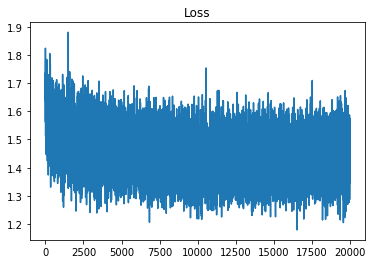

1.429911367389242
0.5306707317073172


In [44]:
plt.plot(stats_bp_alter2['loss_history'])
plt.title('Loss')
plt.show()

print(np.mean(stats_bp_alter2['loss_history'][-5000:]))
print(np.mean(stats_bp_alter2['train_acc_history'][-5000:]))

## Alternative training using advanced SA

In [18]:
#Alternative training using SGD and SA 

#Network Settings

input_size = 16 * 16 * 3
hidden_size = 30
num_classes = 10

from head.neural_net import TwoLayerNet

#np.random.seed(random_seed)

#Training hyperparams
batch_size = 200
learning_rate = 5e-4
reg = 0.1
step_len = 0.001

punish_strength = 1
if_sparse = True

test_acc_list_alter_adv = []
train_acc_list_alter_adv = []
loss_list_alter_adv = []

for i in range(10):
    print('The %d th training' % i)
    net_bp_adv_alter = TwoLayerNet(input_size, hidden_size, num_classes)
    stats_bp_adv_alter1 = net_bp_adv_alter.train_bp(X_train, y_train, X_val, y_val,
                    num_iters=20000, batch_size=batch_size,
                    learning_rate=learning_rate, learning_rate_decay=0.95,
                    reg=reg, verbose=True, print_every = 1000)

    stats_sa_adv = net_bp_adv_alter.train_sa_sparse(X_train, y_train, X_val, y_val,
            num_iters=3000, batch_size=batch_size, step_len = step_len,
            reg=reg, T_max = 0.5, T_min = 0.001, 
            if_sparse = if_sparse, punish_strength = punish_strength, 
            verbose=True, print_every = 1000)

    stats_bp_adv_alter2 = net_bp_adv_alter.train_bp(X_train, y_train, X_val, y_val,
                    num_iters=20000, batch_size=batch_size,
                    learning_rate=learning_rate, learning_rate_decay=0.95,
                    reg=reg, verbose=True, print_every = 1000)

    loss_avg = np.mean(stats_bp_adv_alter2['loss_history'][-5000:])
    train_acc_avg = np.mean(stats_bp_adv_alter2['train_acc_history'][-5000:])
    print('Train accuracy: ', train_acc_avg)
    print('Loss: ', loss_avg)
    
    test_acc = (net_bp_adv_alter.predict(X_test) == y_test).mean()
    print('Test accuracy: ', test_acc)
    print(' ')
    
    loss_list_alter_adv.append(loss_avg)
    train_acc_list_alter_adv.append(train_acc_avg)
    test_acc_list_alter_adv.append(test_acc)


The 0 th training
iteration 0 / 20000: loss 2.302600
iteration 1000 / 20000: loss 1.763808
iteration 2000 / 20000: loss 1.611288
iteration 3000 / 20000: loss 1.659288
iteration 4000 / 20000: loss 1.643556
iteration 5000 / 20000: loss 1.451654
iteration 6000 / 20000: loss 1.470274
iteration 7000 / 20000: loss 1.369812
iteration 8000 / 20000: loss 1.513991
iteration 9000 / 20000: loss 1.528223
iteration 10000 / 20000: loss 1.371145
iteration 11000 / 20000: loss 1.484118
iteration 12000 / 20000: loss 1.423214
iteration 13000 / 20000: loss 1.449208
iteration 14000 / 20000: loss 1.414100
iteration 15000 / 20000: loss 1.468854
iteration 16000 / 20000: loss 1.465487
iteration 17000 / 20000: loss 1.423159
iteration 18000 / 20000: loss 1.410794
iteration 19000 / 20000: loss 1.400529


G:\CBICR_contest\Source\head\neural_net.py:291: RuntimeWarning: overflow encountered in exp
  ratio = np.exp((loss_past - loss_new) / T)


iteration 0 / 3000: loss 1.458816
iteration 0 / 3000: train_acc 0.485000
Ratio: inf   Reject: 0   Accept: 1
3 / 23040 W1 params change
iteration 1000 / 3000: loss 2.175884
iteration 1000 / 3000: train_acc 0.340000
Ratio: 0.10009343312798379   Reject: 324   Accept: 677
23040 / 23040 W1 params change
iteration 2000 / 3000: loss 2.029130
iteration 2000 / 3000: train_acc 0.320000
Ratio: 1.0233304046496126e-12   Reject: 1274   Accept: 727
9521 / 23040 W1 params change


G:\CBICR_contest\Source\head\neural_net.py:48: RuntimeWarning: divide by zero encountered in log
  correct_logprobs = -np.log(probs[np.arange(N),y])


iteration 0 / 20000: loss 2.143639
iteration 1000 / 20000: loss 1.552555
iteration 2000 / 20000: loss 1.672996
iteration 3000 / 20000: loss 1.650748
iteration 4000 / 20000: loss 1.684733
iteration 5000 / 20000: loss 1.472898
iteration 6000 / 20000: loss 1.437933
iteration 7000 / 20000: loss 1.575058
iteration 8000 / 20000: loss 1.465168
iteration 9000 / 20000: loss 1.445878
iteration 10000 / 20000: loss 1.522634
iteration 11000 / 20000: loss 1.477105
iteration 12000 / 20000: loss 1.455301
iteration 13000 / 20000: loss 1.419560
iteration 14000 / 20000: loss 1.580494
iteration 15000 / 20000: loss 1.525101
iteration 16000 / 20000: loss 1.395731
iteration 17000 / 20000: loss 1.520084
iteration 18000 / 20000: loss 1.428494
iteration 19000 / 20000: loss 1.542081
Train accuracy:  0.5213414634146343
Loss:  1.4821758546618127
Test accuracy:  0.495
 
The 1 th training
iteration 0 / 20000: loss 2.302617
iteration 1000 / 20000: loss 1.860653
iteration 2000 / 20000: loss 1.602671
iteration 3000 / 2

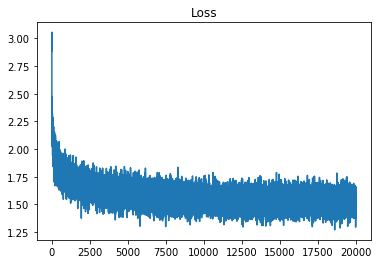

1.525279270473765
0.5055487804878048


In [13]:
plt.plot(stats_bp_adv_alter2['loss_history'])
plt.title('Loss')
plt.show()

print(np.mean(stats_bp_adv_alter2['loss_history'][-5000:]))
print(np.mean(stats_bp_adv_alter2['train_acc_history'][-5000:]))

## Training only using SGD

In [19]:
#Training use SGD 

#Network Settings

input_size = 16 * 16 * 3
hidden_size = 30
num_classes = 10

from head.neural_net import TwoLayerNet

#np.random.seed(random_seed)

#Training hyperparams
batch_size = 200
learning_rate = 5e-4
reg = 0.1

test_acc_list_bp = []
train_acc_list_bp = []
loss_list_bp = []

for i in range(10):
    print('The %d th training' % i)
    net_bp = TwoLayerNet(input_size, hidden_size, num_classes)
    stats_bp = net_bp.train_bp(X_train, y_train, X_val, y_val,
                    num_iters=40000, batch_size=batch_size,
                    learning_rate=learning_rate, learning_rate_decay=0.95,
                    reg=reg, verbose=True, print_every = 1000)

    loss_avg = np.mean(stats_bp['loss_history'][-5000:])
    train_acc_avg = np.mean(stats_bp['train_acc_history'][-5000:])
    print('Train accuracy: ', train_acc_avg)
    print('Loss: ', loss_avg)
    
    test_acc = (net_bp.predict(X_test) == y_test).mean()
    print('Test accuracy: ', test_acc)
    print(' ')
    
    loss_list_bp.append(loss_avg)
    train_acc_list_bp.append(train_acc_avg)
    test_acc_list_bp.append(test_acc)

The 0 th training
iteration 0 / 40000: loss 2.302603
iteration 1000 / 40000: loss 1.709209
iteration 2000 / 40000: loss 1.684392
iteration 3000 / 40000: loss 1.566843
iteration 4000 / 40000: loss 1.568243
iteration 5000 / 40000: loss 1.682842
iteration 6000 / 40000: loss 1.476758
iteration 7000 / 40000: loss 1.493141
iteration 8000 / 40000: loss 1.473971
iteration 9000 / 40000: loss 1.656435
iteration 10000 / 40000: loss 1.567824
iteration 11000 / 40000: loss 1.657160
iteration 12000 / 40000: loss 1.441435
iteration 13000 / 40000: loss 1.500059
iteration 14000 / 40000: loss 1.413653
iteration 15000 / 40000: loss 1.427535
iteration 16000 / 40000: loss 1.449510
iteration 17000 / 40000: loss 1.464323
iteration 18000 / 40000: loss 1.446418
iteration 19000 / 40000: loss 1.514611
iteration 20000 / 40000: loss 1.385371
iteration 21000 / 40000: loss 1.440411
iteration 22000 / 40000: loss 1.475636
iteration 23000 / 40000: loss 1.512339
iteration 24000 / 40000: loss 1.388340
iteration 25000 / 40

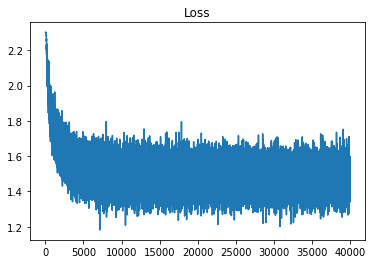

1.4708206179647354
0.48996951219512197


In [46]:
plt.plot(stats_bp['loss_history'])
plt.title('Loss')
plt.show()

print(np.mean(stats_bp['loss_history'][-5000:]))
print(np.mean(stats_bp['train_acc_history'][-5000:]))

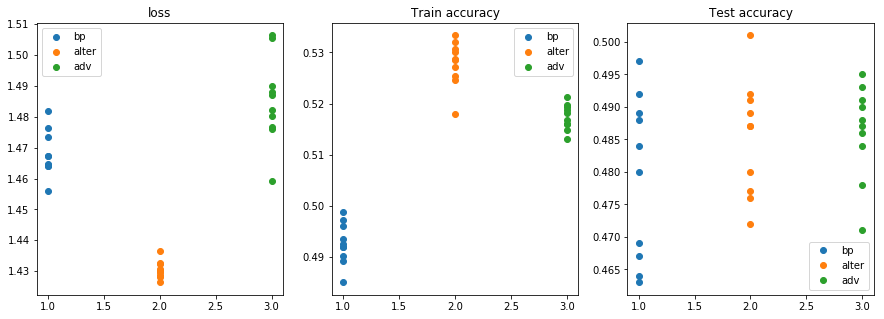

Mean loss:
bp  1.468
alter  1.430
alter_adv  1.485
 
Mean train accuracy:
bp  0.493
alter  0.528
alter_adv  0.517
 
Mean test accuracy:
bp  0.479
alter  0.485
alter_adv  0.486


In [32]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.plot(np.ones(10), loss_list_bp, 'o')
plt.plot(np.ones(10)*2, loss_list_alter, 'o')
plt.plot(np.ones(10)*3, loss_list_alter_adv, 'o')
plt.title('loss')
plt.legend(['bp', 'alter', 'adv'])
#plt.show()
plt.subplot(1,3,2)
plt.plot(np.ones(10), train_acc_list_bp, 'o')
plt.plot(np.ones(10)*2, train_acc_list_alter, 'o')
plt.plot(np.ones(10)*3, train_acc_list_alter_adv, 'o')
plt.title('Train accuracy')
plt.legend(['bp', 'alter', 'adv'])
#plt.show()
plt.subplot(1,3,3)
plt.plot(np.ones(10), test_acc_list_bp, 'o')
plt.plot(np.ones(10)*2, test_acc_list_alter, 'o')
plt.plot(np.ones(10)*3, test_acc_list_alter_adv, 'o')
plt.title('Test accuracy')
plt.legend(['bp', 'alter', 'adv'])
plt.show()

print('Mean loss:')
print('bp %6.3f' % np.mean(loss_list_bp))
print('alter %6.3f' % np.mean(loss_list_alter))
print('alter_adv %6.3f' % np.mean(loss_list_alter_adv))
print(' ')
print('Mean train accuracy:')
print('bp %6.3f' % np.mean(train_acc_list_bp))
print('alter %6.3f' % np.mean(train_acc_list_alter))
print('alter_adv %6.3f' % np.mean(train_acc_list_alter_adv))
print(' ')
print('Mean test accuracy:')
print('bp %6.3f' % np.mean(test_acc_list_bp))
print('alter %6.3f' % np.mean(test_acc_list_alter))
print('alter_adv %6.3f' % np.mean(test_acc_list_alter_adv))